# UCLA DataFest 2020 Team GoDuck

#### Anyi Chen ​anyichen@ucla.edu​ | Miao Xu ​xumiao@ucla.edu​ | Xinyue Gui ​shirleygxy@ucla.edu​ | Yurui Zhang ​yuruizhang9734@ucla.edu

## Import Packages and Read in Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statistics

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
sales_data_2020 = pd.read_excel('sales_data.xls',sheet_name="2020", skiprows=4, nrows=66)
sales_data_2019 = pd.read_excel('sales_data.xls',sheet_name="2019", skiprows=4, nrows=66)

sales_data_2010 = pd.read_excel('sales_data.xls',sheet_name="2010", skiprows=4, nrows=66)
sales_data_2010 = sales_data_2010.rename(columns={'TOTAL':'Total_2010'})
sales_data_2009 = pd.read_excel('sales_data.xls',sheet_name="2009", skiprows=4, nrows=66)
sales_data_2009 = sales_data_2009.rename(columns={'TOTAL':'Total_2009'})
sales_data_2008 = pd.read_excel('sales_data.xls',sheet_name="2008", skiprows=4, nrows=66)
sales_data_2008 = sales_data_2008.rename(columns={'TOTAL':'Total_2008'})

sales_data_2004 = pd.read_excel('sales_data.xls',sheet_name="2004", skiprows=4, nrows=66)
sales_data_2004 = sales_data_2004.rename(columns={'TOTAL':'Total_2004'})
sales_data_2003 = pd.read_excel('sales_data.xls',sheet_name="2003", skiprows=4, nrows=66)
sales_data_2003 = sales_data_2003.rename(columns={'TOTAL':'Total_2003'})
sales_data_2002 = pd.read_excel('sales_data.xls',sheet_name="2002", skiprows=4, nrows=66)
sales_data_2002 = sales_data_2002.rename(columns={'TOTAL':'Total_2002'})

### Retail Sales Data for Covid-19 and H1N1

In [3]:
sales_data_covid_19 = pd.merge(sales_data_2020, sales_data_2019)
sales_data_covid_19 = sales_data_covid_19.rename(columns={'CY CUM': 'CY_CUM_2020', 'PY CUM': 'PY_CUM_2020','TOTAL': 'Total_2020'})
#sales_data_covid_19

In [4]:
sales_data_H1N1 = pd.concat([sales_data_2010, sales_data_2009, sales_data_2008], axis=1, sort=False)
#sales_data_H1N1

### Percent Change in Consumption Data for Covid-19

By looking into the percent change in personal consumption from 1947 to 2020 quarterly, we want to find out which indutries the Covid-19 pandemic impacted most.  

In [5]:
#percentage change:
rmc_perc = pd.read_excel('Percent Change From 1947.xlsx' ,skiprows=7, nrows=30)
rmc_perc.drop([24,29], axis=0, inplace=True)
rmc_perc

,Line,Unnamed: 1,Unnamed: 2,1947Q2,1947Q3,1947Q4,1948Q1,1948Q2,1948Q3,1948Q4,...,2017Q4,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1
0,1.0,Personal consumption expenditures (PCE),DPCERL,6.8,1.3,0.1,2,4.7,0.6,3.2,...,4.6,1.7,4.0,3.5,1.4,1.1,4.6,3.2,1.8,-7.6
1,2.0,Goods,DGDSRL,7.4,2.7,1.5,0.6,3.7,-0.4,2.7,...,7.5,1.3,5.4,3.6,1.6,1.5,8.6,5.3,0.6,-1.3
2,3.0,Durable goods,DDURRL,8.7,5.6,28.6,-2,2.7,7,-5.5,...,12.2,2.3,8.0,3.6,1.3,0.3,13.0,8.1,2.8,-16.1
3,4.0,Motor vehicles and parts,DMOTRL,7.4,-19.9,68.1,29.2,-20.8,11.9,25.6,...,16.0,-5.8,7.4,0.5,2.8,-10.2,16.1,2.5,5.5,-33.2
4,5.0,Furnishings and durable household equipment,DFDHRL,12.6,20.4,21.2,-15.6,23.3,7.9,-22.3,...,12.1,4.5,4.7,5.5,-5.1,1.9,9.0,6.0,1.1,-6.4
5,6.0,Recreational goods and vehicles,DREQRL,10.5,17.4,9.8,-18.1,6.6,-3.1,-18.8,...,12.0,8.9,9.1,6.6,1.9,12.4,17.7,17.0,2.0,0.0
6,7.0,Other durable goods,DODGRL,-1.9,13.8,1.5,-1,1.1,1.7,1.2,...,4.0,7.7,12.9,2.6,6.9,3.0,4.2,9.0,0.5,-14.0
7,8.0,Nondurable goods,DNDGRL,7,1.9,-5.1,1.3,4,-2.4,5.3,...,5.1,0.7,4.1,3.6,1.7,2.2,6.5,3.9,-0.6,6.9
8,9.0,Food and beverages purchased for off-premi...,DFXARL,8.2,-1.6,-9.6,0.8,7,-8.7,7.6,...,6.4,2.4,1.9,2.7,1.4,-1.7,5.3,5.5,-1.3,25.1
9,10.0,Clothing and footwear,DCLORL,-4.7,6.7,-0.4,-3.7,2.5,3.8,9.3,...,6.5,-1.7,9.6,8.1,0.0,-3.8,14.5,-2.3,4.9,-36.0


In [6]:
# H1N1 2008-2010 data
type = (rmc_perc.iloc[:, 1]).to_frame(name = 'type')
h1n1_perc = pd.concat([type, rmc_perc.loc[:,'2008Q1':'2010Q1']], axis = 1)
h1n1_perc

,type,2008Q1,2008Q2,2008Q3,2008Q4,2009Q1,2009Q2,2009Q3,2009Q4,2010Q1
0,Personal consumption expenditures (PCE),-1.1,0.6,-3.0,-3.7,-0.9,-1.6,2.8,-0.6,2.0
1,Goods,-6.4,-0.6,-8.1,-11.6,0.1,-2.5,7.2,-2.1,3.0
2,Durable goods,-12.3,-2.8,-12.8,-26.3,0.7,-2.9,20.9,-9.1,5.0
3,Motor vehicles and parts,-19.6,-14.2,-19.2,-39.4,10.1,3.1,53.7,-32.4,-3.9
4,Furnishings and durable household equipment,-10.0,-1.2,-15.3,-19.2,-11.1,-7.4,3.5,2.9,10.9
5,Recreational goods and vehicles,-6.7,10.6,-7.2,-21.6,2.6,-7.6,13.0,8.4,7.6
6,Other durable goods,-9.3,-4.2,-5.5,-17.8,-0.7,2.5,5.7,1.3,10.5
7,Nondurable goods,-3.1,0.6,-5.7,-3.8,-0.1,-2.4,1.3,1.3,2.1
8,Food and beverages purchased for off-premi...,-2.2,-1.0,-6.4,-5.6,1.5,2.6,2.4,2.4,2.7
9,Clothing and footwear,-3.0,9.1,-9.2,-12.9,-4.4,-6.9,3.8,2.2,9.5


In [7]:
covid19_perc = rmc_perc.loc[:,'2018Q1':'2020Q1']

#covid-19  2019-2020
covid_perc = pd.concat([type, rmc_perc.loc[:,'2018Q1':'2020Q1']], axis = 1)

#ranked by the biggest impact 
covid_perc['diff'] = rmc_perc.loc[:,'2020Q1'] - rmc_perc.loc[:,'2019Q4']
covid_perc.sort_values(by=['diff'], inplace=True)
covid_perc

,type,2018Q1,2018Q2,2018Q3,2018Q4,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,diff
9,Clothing and footwear,-1.7,9.6,8.1,0.0,-3.8,14.5,-2.3,4.9,-36.0,-40.9
3,Motor vehicles and parts,-5.8,7.4,0.5,2.8,-10.2,16.1,2.5,5.5,-33.2,-38.7
17,Recreation services,6.1,6.3,0.9,3.2,-1.0,6.4,0.1,5.5,-31.9,-37.4
18,Food services and accommodations,5.8,4.9,7.5,-2.4,-1.3,4.8,3.4,1.0,-29.7,-30.7
16,Transportation services,5.7,-4.2,-0.7,-0.8,0.3,7.8,4.4,0.7,-29.2,-29.9
15,Health care,1.7,3.5,5.3,-1.9,6.5,3.4,0.6,4.9,-18.0,-22.9
2,Durable goods,2.3,8.0,3.6,1.3,0.3,13.0,8.1,2.8,-16.1,-18.9
23,Less: Receipts from sales of goods and ser...,-2.3,6.0,5.8,-5.8,13.6,2.1,0.3,4.0,-11.5,-15.5
13,Household consumption expenditures (for serv...,1.7,3.0,3.3,0.5,2.2,2.9,2.3,2.9,-11.9,-14.8
28,Market-based PCE excluding food and energy\6\,1.7,3.6,3.5,0.3,2.5,5.1,3.1,2.5,-12.3,-14.8


### Graph Illustrations of Percent Change

C:\Users\Owner\Anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Owner\Anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Owner\Anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\Users\Owner\Anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecatio

Text(0.5, 0.95, 'Percent Change in Personal Consumption by Industry')

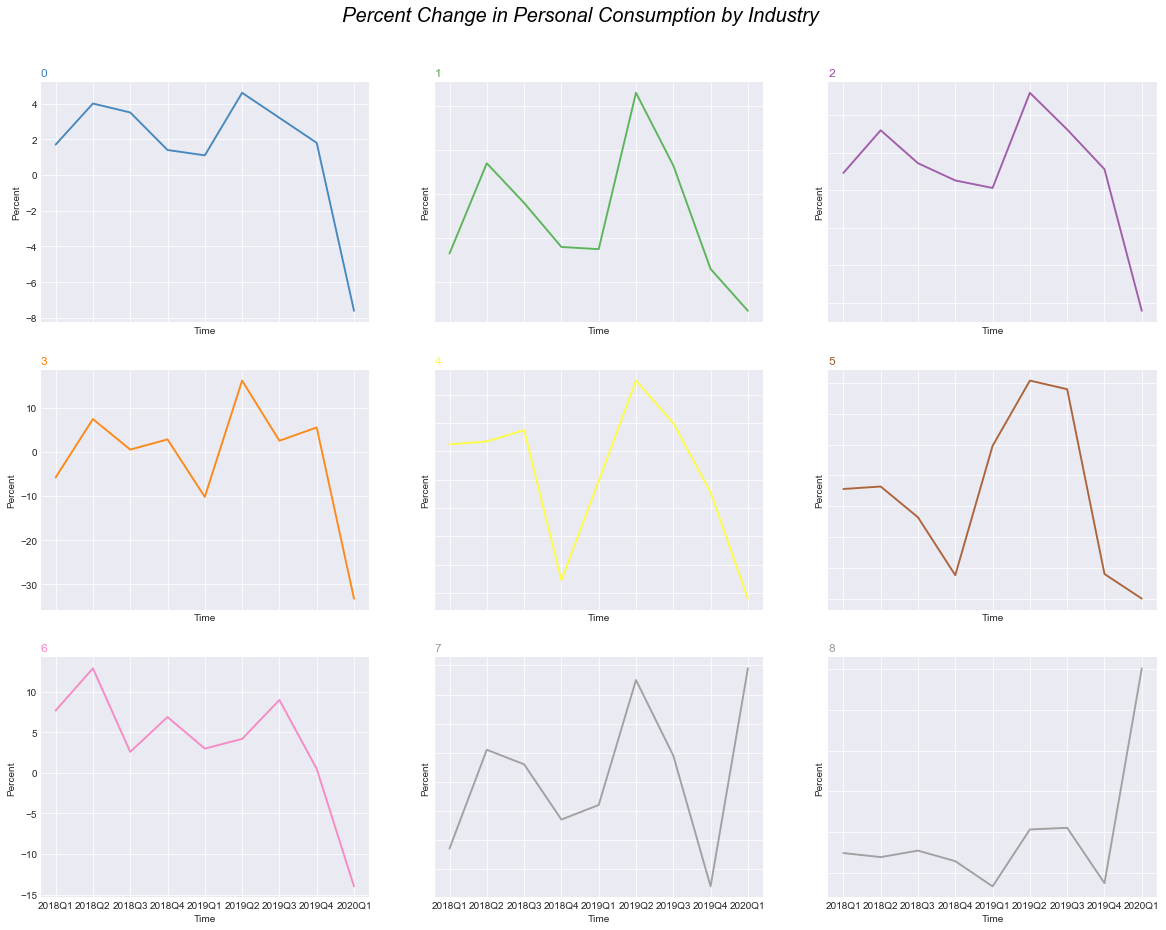

In [8]:
df2 = covid19_perc.T

plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')
 
num=0
plt.figure(figsize=(20,15))

for column in df2.iloc[:,0:9]:
    num+=1
 
    plt.subplot(3,3, num)
 
    plt.plot(df2.index.tolist(), df2[column], marker='', color=palette(num), linewidth=1.9, alpha=0.9, label=column)
    plt.xlabel("Time")
    plt.ylabel("Percent")
 
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
plt.suptitle("Percent Change in Personal Consumption by Industry", fontsize=20, fontweight=0, color='black', style='italic', y=0.95)



## Model Building: Time Series Model 

### Clothing and Footwear Industry For Covid-19 year 2008 - 2020

In [9]:
# data from 2008-2020
sales_data_2020 = pd.read_excel('sales_data.xls',sheet_name="2020", skiprows=4, nrows=66,usecols=range(2,5))
sales_data_2019 = pd.read_excel('sales_data.xls',sheet_name="2019", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2018 = pd.read_excel('sales_data.xls',sheet_name="2018", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2017 = pd.read_excel('sales_data.xls',sheet_name="2017", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2016 = pd.read_excel('sales_data.xls',sheet_name="2016", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2015 = pd.read_excel('sales_data.xls',sheet_name="2015", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2014 = pd.read_excel('sales_data.xls',sheet_name="2014", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2013 = pd.read_excel('sales_data.xls',sheet_name="2013", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2012 = pd.read_excel('sales_data.xls',sheet_name="2012", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2011 = pd.read_excel('sales_data.xls',sheet_name="2011", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2010 = pd.read_excel('sales_data.xls',sheet_name="2010", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2009 = pd.read_excel('sales_data.xls',sheet_name="2009", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2008 = pd.read_excel('sales_data.xls',sheet_name="2008", skiprows=4, nrows=66,usecols=range(0,14))

df = pd.concat([sales_data_2008,sales_data_2009,sales_data_2010,sales_data_2011,sales_data_2012,sales_data_2013,sales_data_2014,sales_data_2015,sales_data_2016,sales_data_2017,sales_data_2018, sales_data_2019, sales_data_2020], axis=1, sort=False)
df.drop(0, axis=0, inplace=True)
df = df.rename(columns={'Unnamed: 1': 'type'})
df = df.rename(columns={'Unnamed: 0': 'NAICS Code'})

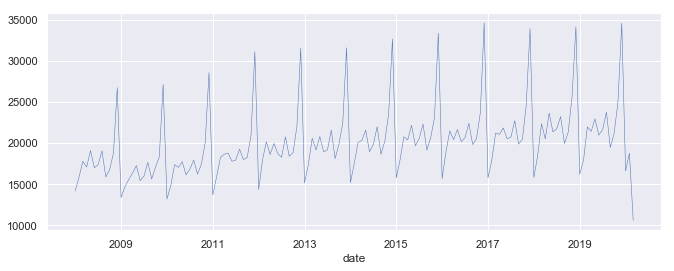

In [10]:
# time series for type 10: Clothing and footwear covid19

# extract 'clothing and footwear' from 01/2008-03/2020 monthly data
# 'clothing and accessories' has NAICS code 448
cloth = df.loc[df['NAICS Code'] == 448]
cloth = cloth.drop(['NAICS Code','type'],axis=1)
cloth_values = np.asarray(cloth)
cloth_values = np.concatenate(cloth_values).ravel()
daterange = pd.date_range('2008-01','2020-04' , freq='M') 

ts1 = pd.DataFrame({'date':daterange, 'value':cloth_values})
ts1 = ts1.set_index('date')

sns.set(rc={'figure.figsize':(11, 4)})
ts1['value'].plot(linewidth=0.5);
### we observed a significant drop after date 2020-02, so we decided to use data from 2008-01 to 2020-02 to predict 2020-03
ts1_sub = ts1[:-1]

ADF Statistic: -1.593106
p-value: 0.487056
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Fail to reject Ho - Time series is not stationary.
ADF Statistic: -1.920110
p-value: 0.322661
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Fail to reject Ho - Time series is not stationary.
ADF Statistic: -1.759442
p-value: 0.400776
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Fail to reject Ho - Time series is not stationary.
ADF Statistic: -2.311874
p-value: 0.168167
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Fail to reject Ho - Time series is not stationary.


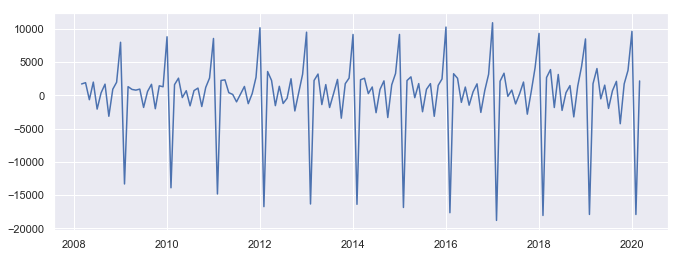

ADF Statistic: -3.493063
p-value: 0.008167
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Reject Ho - time series is stationary


In [11]:
###1.2 build model

#a. check stationary-- use Dickey-Fuller test

X = ts1_sub['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")    
    
#b. data transformation to remove non-stationarity 

## Log transformation
X = ts1_sub['value'].values.astype(np.int64)
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")
    
## Sqrt transformation
X = ts1_sub['value'].values.astype(np.int64)
X = np.sqrt(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")


## boxcox transformation

from scipy import stats

X = ts1_sub['value'].values.astype(np.int64)
X, lam = stats.boxcox(X)
X = stats.boxcox(X,lam)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")
    

## Differencing till it's stationary
## d = 1
diff1 = ts1_sub.diff().dropna()
plt.plot(diff1)
plt.show()
X = diff1['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

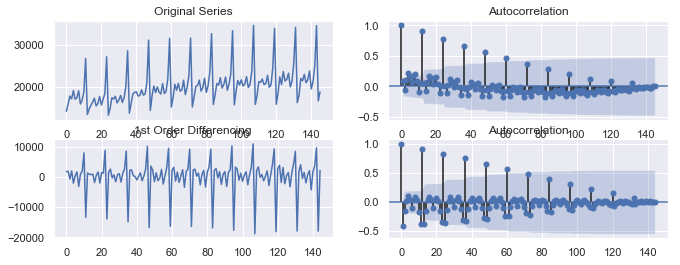

In [12]:
# Original Series

diff1.reset_index(drop=True,inplace=True)


fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(ts1_sub['value'].values.astype(np.int64))
axes[0, 0].set_title('Original Series')

plot_acf(ts1_sub['value'].values.astype(np.int64), ax=axes[0, 1])


axes[1, 0].plot(diff1.value.astype(np.int64))
axes[1, 0].set_title('1st Order Differencing')

plot_acf(diff1.value.astype(np.int64), ax=axes[1, 1])

plt.show()

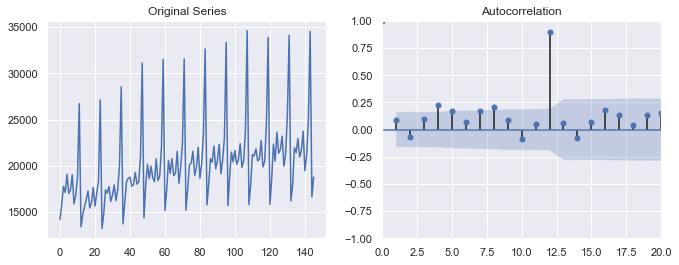

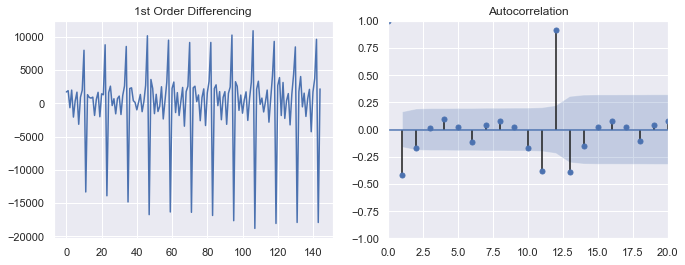

C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


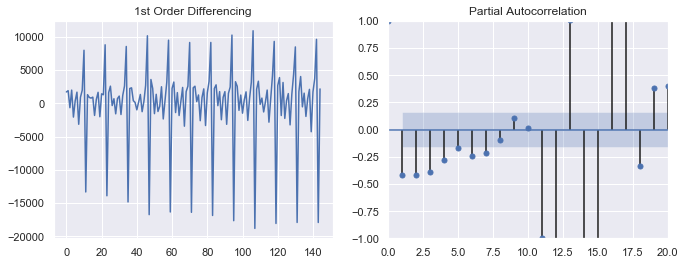

In [13]:
#c. build ARIMA model
 
##select p,q - plot ACF PACF 
diff1.reset_index(drop=True,inplace=True)

fig, axes = plt.subplots(1, 2)
axes[0].plot(ts1_sub['value'].values.astype(np.int64))
axes[0].set_title('Original Series')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(ts1_sub['value'].values.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff1.value.astype(np.int64))
axes[0].set_title('1st Order Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(diff1.value.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff1.value.astype(np.int64))
axes[0].set_title('1st Order Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_pacf(diff1.value.astype(np.int64), ax=axes[1])

plt.show()

#From ACF and PACF plot, we conservatively chose p:4, q:2
#Since it has seasonailty of 12, we arrive on a SARIMA(4,1,2) with s=12 model

In [14]:
model = ARIMA(diff1.value.astype(np.int64), order=(4,1,2)) #411
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  144
Model:                 ARIMA(4, 1, 2)   Log Likelihood               -1395.488
Method:                       css-mle   S.D. of innovations           3702.288
Date:                Fri, 15 May 2020   AIC                           2806.976
Time:                        03:24:32   BIC                           2830.735
Sample:                             1   HQIC                          2816.630
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4347      1.232      0.353      0.725      -1.981       2.850
ar.L1.D.value    -0.1689      0.084     -2.015      0.046      -0.333      -0.005
ar.L2.D.value    -0.3197      0.084     

C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\Owner\Anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Owner\Anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Owner\Anaconda3\Lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


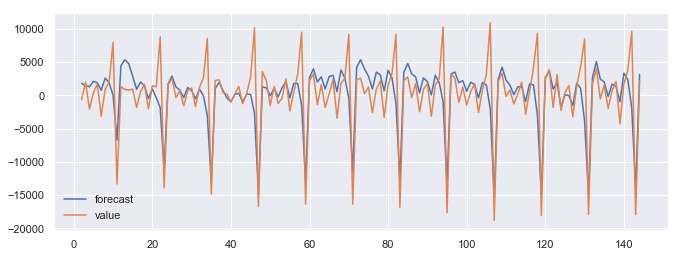

<Figure size 7200x5760 with 0 Axes>

In [16]:
model_fit.plot_predict(dynamic=False)
plt.figure(figsize=(100,80))
plt.show()

In [17]:
fitted = model.fit(disp=-1)
fc, se, conf = fitted.forecast(1, alpha=0.05)

print([fc,se,conf])

[array([4836.99614581]), array([3702.28767324]), array([[-2419.35435415, 12093.34664577]])]


C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


  
### Clothing and Footwear Industry For H1N1 year 1997 - 2009

In [18]:
#data from 2009-1997
sales_data_2009 = pd.read_excel('sales_data.xls',sheet_name="2009", skiprows=4, nrows=66,usecols=range(2,7))
sales_data_2008 = pd.read_excel('sales_data.xls',sheet_name="2008", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2007 = pd.read_excel('sales_data.xls',sheet_name="2007", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2006 = pd.read_excel('sales_data.xls',sheet_name="2006", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2005 = pd.read_excel('sales_data.xls',sheet_name="2005", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2004 = pd.read_excel('sales_data.xls',sheet_name="2004", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2003 = pd.read_excel('sales_data.xls',sheet_name="2003", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2002 = pd.read_excel('sales_data.xls',sheet_name="2002", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2001 = pd.read_excel('sales_data.xls',sheet_name="2001", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_2000 = pd.read_excel('sales_data.xls',sheet_name="2000", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_1999 = pd.read_excel('sales_data.xls',sheet_name="1999", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_1998 = pd.read_excel('sales_data.xls',sheet_name="1998", skiprows=4, nrows=66,usecols=range(2,14))
sales_data_1997 = pd.read_excel('sales_data.xls',sheet_name="1997", skiprows=4, nrows=66,usecols=range(0,14))

df2 = pd.concat([sales_data_1997,sales_data_1998,sales_data_1999,sales_data_2000,sales_data_2001,sales_data_2002,sales_data_2003,sales_data_2004,sales_data_2005,sales_data_2006,sales_data_2007, sales_data_2008, sales_data_2009], axis=1, sort=False)
df2.drop(0, axis=0, inplace=True)
df2 = df2.rename(columns={'Unnamed: 1': 'type'})
df2 = df2.rename(columns={'Unnamed: 0': 'NAICS Code'})

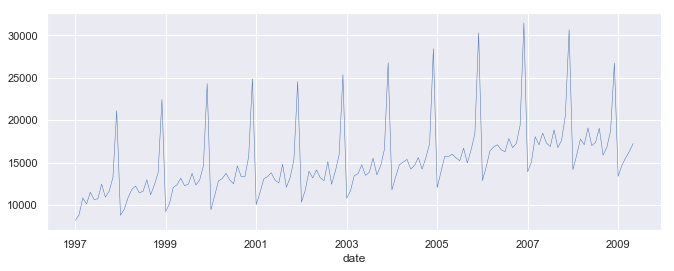

In [19]:
#2. time series for type10: Clothing and footwear H1N1

#extract 'clothing and footwear' from 01/1997-06/2009 monthly data
# 'clothing and accessories' has NAICS code 448
cloth = df2.loc[df2['NAICS Code'] == 448]
cloth = cloth.drop(['NAICS Code','type'],axis=1)
cloth_values = np.asarray(cloth)
cloth_values = np.concatenate(cloth_values).ravel()
daterange = pd.date_range('1997-01','2009-06', freq='M')

ts2 = pd.DataFrame({'date':daterange, 'value':cloth_values})
ts2 = ts2.set_index('date')

sns.set(rc={'figure.figsize':(11, 4)})
ts2['value'].plot(linewidth=0.5);
ts2_sub = ts2[:-1]

ADF Statistic: -1.836977
p-value: 0.362264
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Fail to reject Ho - Time series is not stationary.


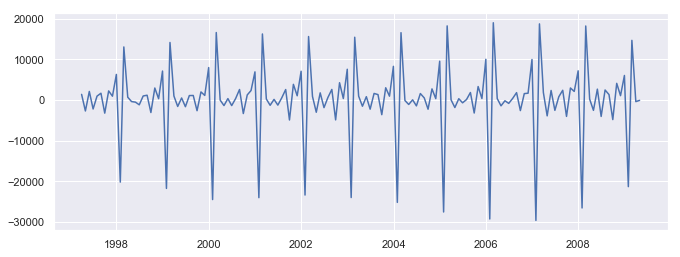

ADF Statistic: -15.071761
p-value: 0.000000
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Reject Ho - time series is stationary


In [20]:
###2.2 build model

#a. check stationary-- use Dickey-Fuller test

X = ts2_sub['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")
    
    
#b. data transformation to remove non-stationarity 


##differencing till it's stationary
## variance stability
## d = 2
diff1 = ts2_sub.diff().dropna()
diff2 = diff1.diff().dropna()
plt.plot(diff2)
plt.show()
X = diff2['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

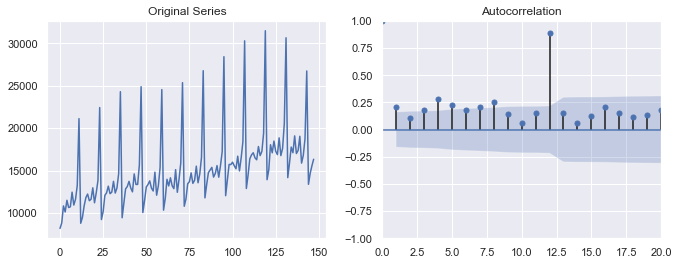

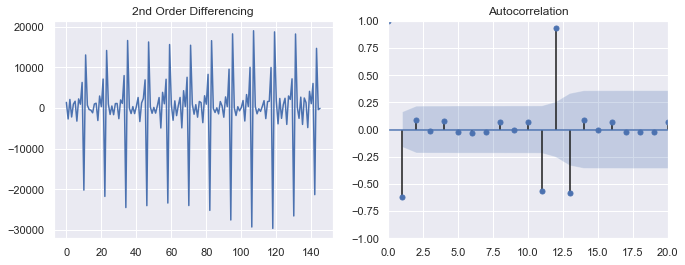

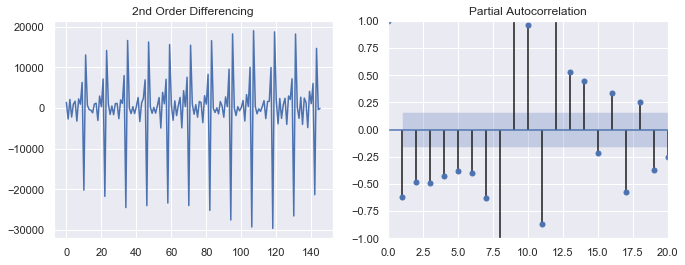

In [21]:
#c. build ARIMA model
 
##select p,q - plot ACF PACF 
diff2.reset_index(drop=True,inplace=True)

fig, axes = plt.subplots(1, 2)
axes[0].plot(ts2_sub['value'].values.astype(np.int64))
axes[0].set_title('Original Series')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(ts2_sub['value'].values.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff2.value.astype(np.int64))
axes[0].set_title('2nd Order Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(diff2.value.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff2.value.astype(np.int64))
axes[0].set_title('2nd Order Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_pacf(diff2.value.astype(np.int64), ax=axes[1])

plt.show()

#From ACF and PACF plot, we conservatively chose p:6, q:3
#Since it has seasonailty of 12, we arrive on a SARIMA(6,2,3) with s=12 model

In [22]:
model2 = ARIMA(diff2.value.astype(np.int64), order=(6,2,3)) #723 613
model_fit2 = model2.fit(disp=0)
print(model_fit2.summary())

C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  144
Model:                 ARIMA(6, 2, 3)   Log Likelihood               -1449.636
Method:                       css-mle   S.D. of innovations           5348.164
Date:                Fri, 15 May 2020   AIC                           2921.272
Time:                        03:25:00   BIC                           2953.940
Sample:                             2   HQIC                          2934.547
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.9896      1.662     -0.595      0.553      -4.247       2.268
ar.L1.D2.value    -2.5194      0.080    -31.689      0.000      -2.675      -2.364
ar.L2.D2.value    -4.0154      0.168

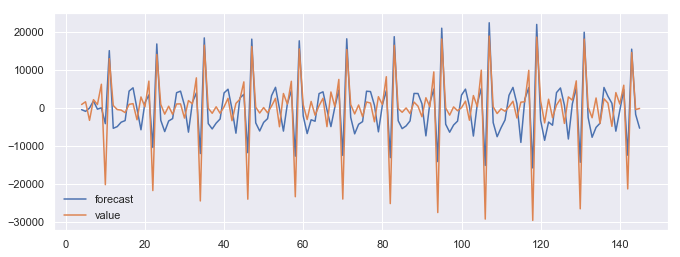

<Figure size 7200x5760 with 0 Axes>

In [23]:
model_fit2.plot_predict(dynamic=False)
plt.figure(figsize=(100,80))
plt.show()

In [24]:
fitted2 = model2.fit(disp=-1)
fc2, se2, conf2 = fitted2.forecast(1, alpha=0.05)

print([fc2,se2,conf2])

[array([-5906.43907654]), array([5348.16381804]), array([[-16388.64754332,   4575.76939024]])]


C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Total Retail Sales For Covid-19 year 2008 - 2020

NAICS Code                      NaN
type            Retail sales, total
Jan. 2008                    307576
Feb. 2008                    308171
Mar. 2008                    334416
Apr. 2008                    331002
May 2008                     357277
Jun. 2008                    339791
Jul. 2008                    344158
Aug. 2008                    342443
Sep. 2008                    313308
Oct. 2008                    311422
Nov. 2008                    299238
Dec. 2008                    346513
Jan. 2009                    273998
Feb. 2009                    264465
Mar. 2009                    290068
Apr. 2009                    292041
May 2009                     307481
Jun. 2009                    306050
Jul. 2009                    308847
Aug. 2009                    314505
Sep. 2009                    288071
Oct. 2009                    300360
Nov. 2009                    303850
Dec. 2009                    362735
Jan. 2010                    279044
Feb. 2010                   

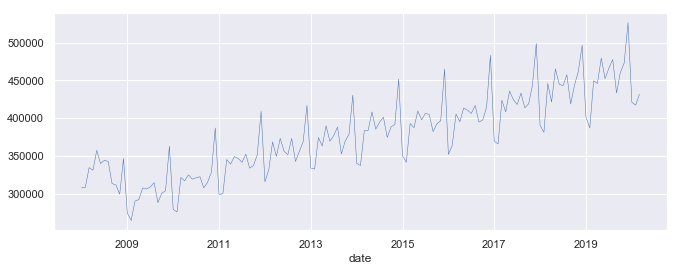

In [25]:
#3. time series for Total Retail Sales. Covid-19

#extract 'Retail Sales, total' from 01/2008-03/2020 monthly data
# 'Retail Sales, total' has self-defined NAICS code 1
total = df.iloc[4,:]
total = total.drop(['NAICS Code','type'])
total_values = np.asarray(total)
total_values = total_values.ravel()
daterange = pd.date_range('2008-01','2020-04' , freq='M') 

ts3 = pd.DataFrame({'date':daterange, 'value':total_values})
ts3 = ts3.set_index('date')

sns.set(rc={'figure.figsize':(11, 4)})
ts3['value'].plot(linewidth=0.5);
ts3_sub = ts3[:-1]

ADF Statistic: -0.659082
p-value: 0.857066
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Fail to reject Ho - Time series is not stationary.
ADF Statistic: -1.511481
p-value: 0.527824
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.579
Fail to reject Ho - Time series is not stationary.


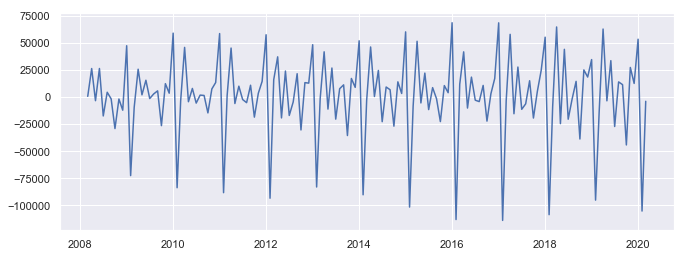

ADF Statistic: -4.575502
p-value: 0.000143
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Reject Ho - time series is stationary


In [26]:
###3.2 build model
#a. check stationary-- use Dickey-Fuller test

X = ts3_sub['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")
    
    
#b. data transformation to remove non-stationarity 

## boxcox transformation
X = ts3_sub['value'].values.astype(np.int64)
X, lam = stats.boxcox(X)
X = stats.boxcox(X,lam)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

##differencing till it's stationary
## d = 1
diff1 = ts3_sub.diff().dropna()
plt.plot(diff1)
plt.show()
X = diff1['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

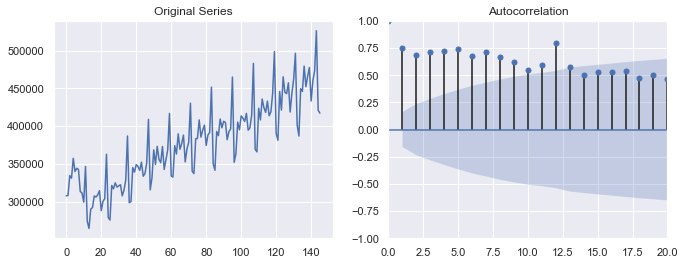

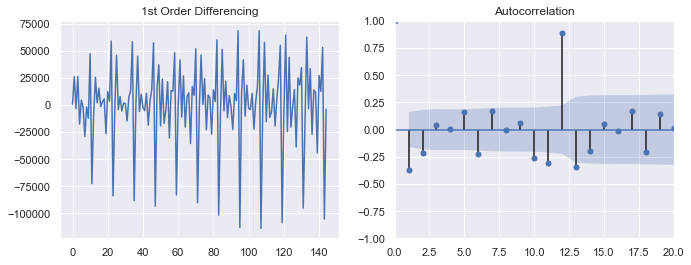

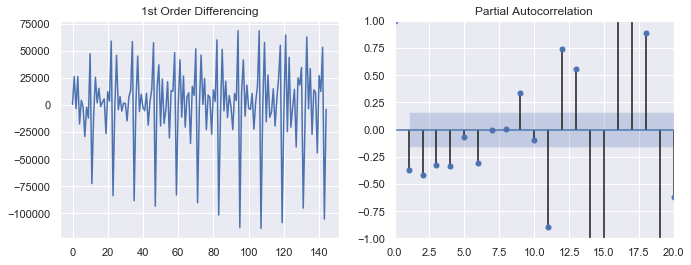

In [27]:
#c. build ARIMA model
 
##select p,q - plot ACF PACF 
diff1.reset_index(drop=True,inplace=True)

fig, axes = plt.subplots(1, 2)
axes[0].plot(ts3_sub['value'].values.astype(np.int64))
axes[0].set_title('Original Series')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(ts3_sub['value'].values.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff1.value.astype(np.int64))
axes[0].set_title('1st Order Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(diff1.value.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff1.value.astype(np.int64))
axes[0].set_title('1st Order Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_pacf(diff1.value.astype(np.int64), ax=axes[1])

plt.show()

#From ACF and PACF plot, we conservatively chose p:3, q:2
#Since it has seasonailty of 12, we arrive on a SARIMA(3,1,2) with s=12 model

In [28]:
model3 = ARIMA(diff1.value.astype(np.int64), order=(3,1,2))
model_fit3 = model3.fit(disp=0)
print(model_fit3.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  144
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1677.180
Method:                       css-mle   S.D. of innovations          26435.394
Date:                Fri, 15 May 2020   AIC                           3368.360
Time:                        03:25:37   BIC                           3389.149
Sample:                             1   HQIC                          3376.807
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            55.2622     62.788      0.880      0.380     -67.800     178.324
ar.L1.D.value     0.0029      0.084      0.034      0.973      -0.163       0.168
ar.L2.D.value    -0.2805      0.082     

C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


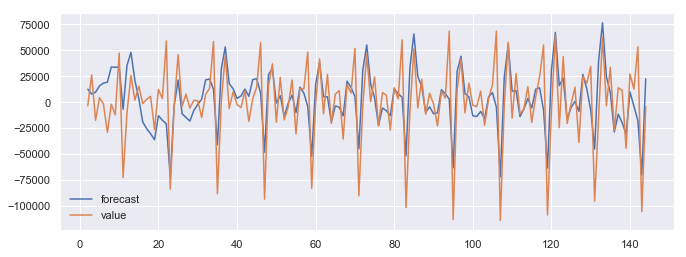

<Figure size 7200x5760 with 0 Axes>

In [29]:
model_fit3.plot_predict(dynamic=False)
plt.figure(figsize=(100,80))
plt.show()

In [30]:
from statsmodels.tsa.arima_model import ARIMA
fitted3 = model3.fit(disp=-1)
fc3, se3, conf3 = fitted3.forecast(1, alpha=0.05)

print([fc3,se3,conf3])

[array([54387.24474156]), array([26435.39412743]), array([[  2574.82433468, 106199.66514845]])]


C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


### Total Retail Sales For H1N1 year 2008 - 2019

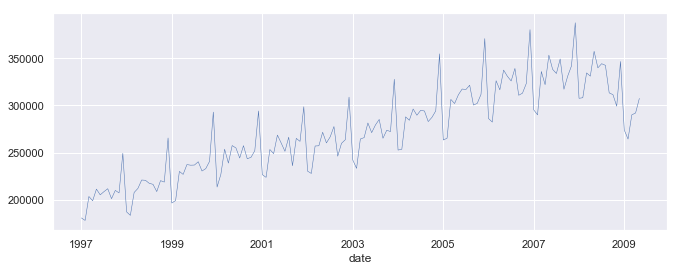

In [31]:
#4. time series for Total Retail Sales. H1N1

#extract 'Retail Sales, total' from 01/1997-06/2009 monthly data
# 'Retail Sales, total' has self-defined NAICS code 1
total2 = df2.iloc[4,:]
total2 = total2.drop(['NAICS Code','type'])
total2_values = np.asarray(total2)
total2_values = total2_values.ravel()
daterange = pd.date_range('1997-01','2009-06' , freq='M') 

ts4 = pd.DataFrame({'date':daterange, 'value':total2_values})
ts4 = ts4.set_index('date')

sns.set(rc={'figure.figsize':(11, 4)})
ts4['value'].plot(linewidth=0.5);

ts4_sub = ts4[:-1]

ADF Statistic: -2.280897
p-value: 0.178203
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Fail to reject Ho - Time series is not stationary.
ADF Statistic: -2.124023
p-value: 0.234965
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Fail to reject Ho - Time series is not stationary.
ADF Statistic: -2.089672
p-value: 0.248688
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Fail to reject Ho - Time series is not stationary.
ADF Statistic: -2.164695
p-value: 0.219308
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Fail to reject Ho - Time series is not stationary.


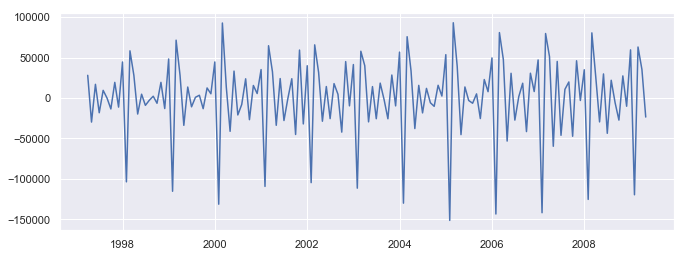

ADF Statistic: -10.658491
p-value: 0.000000
Critical Values:
	1%: -3.481
	5%: -2.884
	10%: -2.578
Reject Ho - time series is stationary


In [32]:
###4.2 build model
#a. check stationary-- use Dickey-Fuller test

X = ts4_sub['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")
    
    
#b. data transformation to remove non-stationarity 

from statsmodels.tsa.stattools import adfuller

## boxcox transformation
X = ts4_sub['value'].values.astype(np.int64)
X, lam = stats.boxcox(X)
X = stats.boxcox(X,lam)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

## Log transformation
X = ts4_sub['value'].values.astype(np.int64)
X = np.log(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

# sqrt transformation
X = ts4_sub['value'].values.astype(np.int64)
X = np.sqrt(X)
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

##differencing till it's stationary
## d = 2
diff1 = ts4_sub.diff().dropna()
diff2 = diff1.diff().dropna()
plt.plot(diff2)
plt.show()
X = diff2['value'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0] < result[4]['5%']:
    print("Reject Ho - time series is stationary")
else:
    print("Fail to reject Ho - Time series is not stationary.")

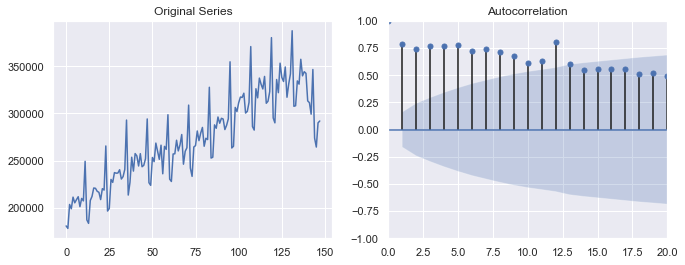

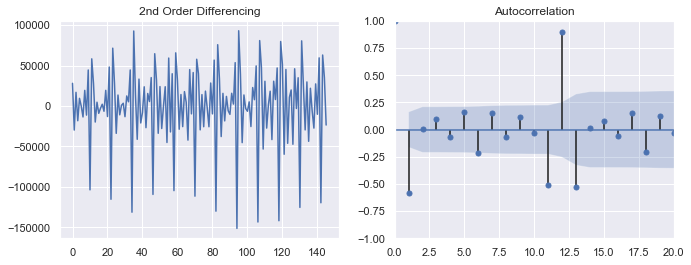

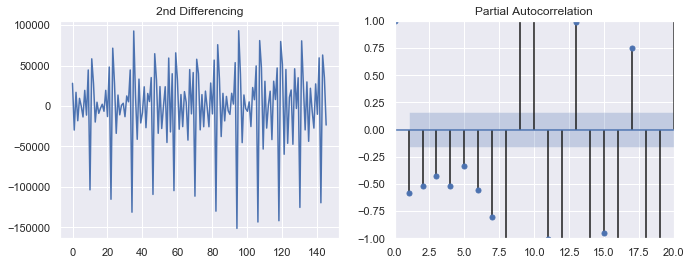

In [33]:
#c. build ARIMA model
 
##select p,q - plot ACF PACF 
diff2.reset_index(drop=True,inplace=True)

fig, axes = plt.subplots(1, 2)
axes[0].plot(ts4_sub['value'].values.astype(np.int64))
axes[0].set_title('Original Series')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(ts4_sub['value'].values.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff2.value.astype(np.int64))
axes[0].set_title('2nd Order Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_acf(diff2.value.astype(np.int64), ax=axes[1])
plt.show()

fig, axes = plt.subplots(1, 2)
axes[0].plot(diff2.value.astype(np.int64))
axes[0].set_title('2nd Differencing')
axes[1].set(xlim=(0,20),ylim=(-1,1))
plot_pacf(diff2.value.astype(np.int64), ax=axes[1])

plt.show()

#From ACF and PACF plot, we conservatively chose p:5, q:2
#Since it has seasonailty of 12, we arrive on a SARIMA(5,2,2) with s=12 model

In [34]:
model4 = ARIMA(diff2.value.astype(np.int64), order=(8,2,1))
model_fit4 = model4.fit(disp=0)
print(model_fit4.summary())

C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  144
Model:                 ARIMA(8, 2, 1)   Log Likelihood               -1688.292
Method:                       css-mle   S.D. of innovations          28024.884
Date:                Fri, 15 May 2020   AIC                           3398.583
Time:                        03:26:30   BIC                           3431.251
Sample:                             2   HQIC                          3411.858
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0920      2.893     -0.032      0.975      -5.763       5.579
ar.L1.D2.value    -2.1391      0.072    -29.868      0.000      -2.279      -1.999
ar.L2.D2.value    -3.1794      0.160

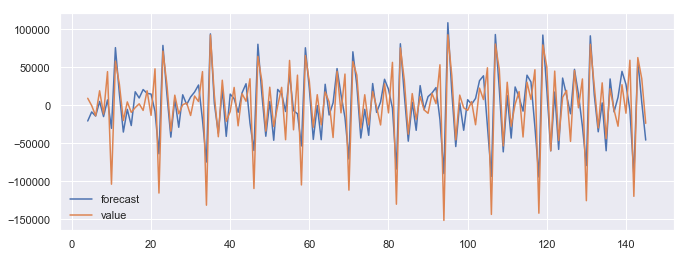

<Figure size 7200x5760 with 0 Axes>

In [35]:
model_fit4.plot_predict(dynamic=False)
plt.figure(figsize=(100,80))
plt.show()

In [36]:
from statsmodels.tsa.arima_model import ARIMA
fitted4 = model4.fit(disp=-1)
fc4, se4, conf4 = fitted4.forecast(1, alpha=0.05)

print([fc4,se4,conf4])

[array([-10096.6541519]), array([28024.88421249]), array([[-65024.41787928,  44831.10957547]])]


C:\Users\Owner\Anaconda3\Lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [37]:
actual = [431702,306050,10603,15434]
#total_actual = [431702,306050]
pred = [fc3[0]+417108,fc4[0]+1973+292041,fc[0]+18769,fc2[0]+774+16337]

### Actual and Predicted Sales by Pandemics

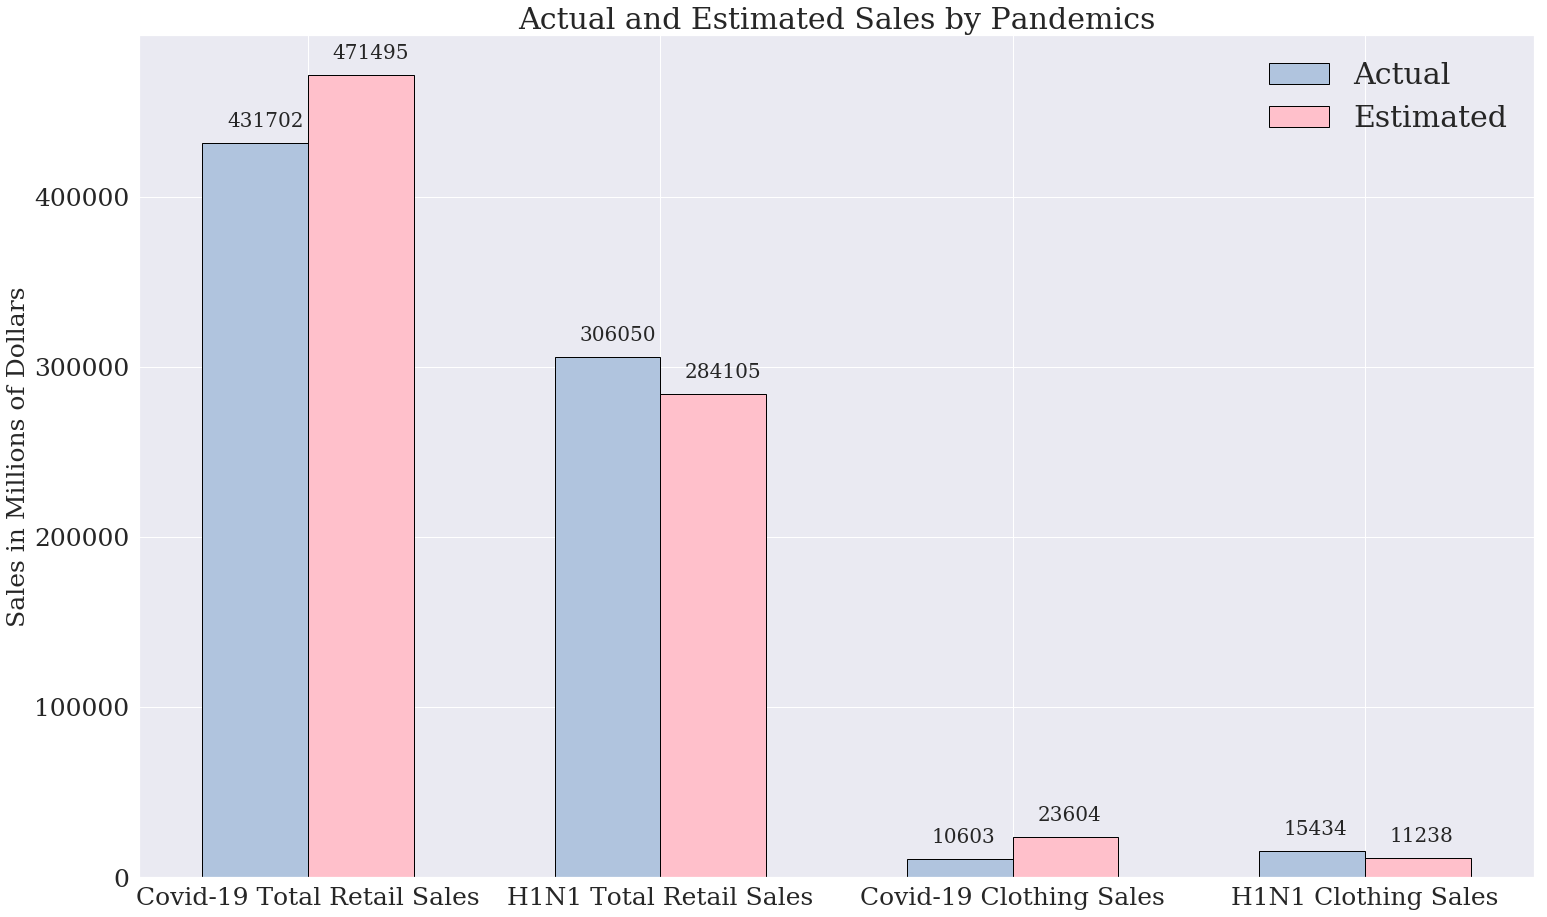

In [38]:
barWidth = 0.3
r1 = np.arange(len(actual))
r2 = np.array([x + barWidth for x in r1])
r3 = r1+r2
r4 = np.concatenate((r1,r2))

alll = actual + pred


plt.figure(figsize=(25,15))
plt.rc('ytick', labelsize=25)
plt.rcParams["axes.grid"] = True
#plt.rcParams['axes.facecolor'] = 'white' #LightSteelBlue
plt.rcParams["font.family"] = "serif" #serif

plt.bar(r1, actual, width = barWidth, color = 'LightSteelBlue', edgecolor = 'black', capsize=7, label='Actual')
plt.bar(r2, pred, width = barWidth, color = 'pink', edgecolor = 'black', capsize=7, label='Estimated')
plt.ylabel('Sales in Millions of Dollars',fontsize = 25)

plt.legend(fontsize=30)

plt.xticks([r + barWidth-0.15 for r in range(len(r3))], ['Covid-19 Total Retail Sales', 'H1N1 Total Retail Sales', 'Covid-19 Clothing Sales', 'H1N1 Clothing Sales'], rotation=0,size=25)
label = ['431702','306050','10603','15434', '471495', '284105', '23604', '11238']

for i in range(len(r4)):
    plt.text(x = r4[i]-0.08, y = alll[i]+9500, s = label[i], size = 20)

plt.subplots_adjust(bottom= 0.2, top = 0.98)
plt.title("Actual and Estimated Sales by Pandemics", fontsize=30)

plt.show()